In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
%matplotlib inline


df = pd.read_csv("data/kc_house_data.csv", index_col=0)

In [2]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.value_counts(['bedrooms'])

bedrooms
3           9824
4           6882
2           2760
5           1601
6            272
1            196
7             38
8             13
9              6
10             3
33             1
11             1
dtype: int64

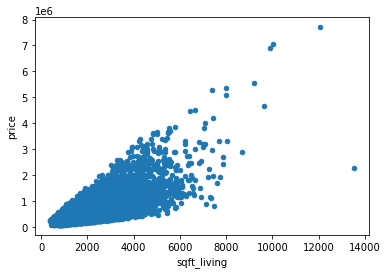

In [6]:
df.plot(x="sqft_living", y="price", kind="scatter");

In [7]:
results = sm.OLS(df["sqft_living"], sm.add_constant(df[["price"]])).fit()
results.params

const    1132.537450
price       0.001754
dtype: float64

In [8]:
results.pvalues

const    0.0
price    0.0
dtype: float64

In [9]:
results.conf_int()

,0,1
const,1117.025213,1148.049687
price,0.001730,0.001778


In [10]:
correlation, p_value = pearsonr(df["sqft_living"], df["price"])
correlation

0.7019173021377597

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:08:54   Log-Likelihood:            -1.7066e+05
No. Observations:               21597   AIC:                         3.413e+05
Df Residuals:                   21595   BIC:                         3.413e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1132.5374      7.914    143.104      0.000    1117.025    1148.050
price          0.0018   1.21e-05    144.819      0.000       0.002       0.002
==============================================================================
Omnibus:                     2829.055   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8794.373
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                       5.810   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)


In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074


In [15]:
df['price_sqft'] = df['price'] / df['sqft_living']

In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,price_sqft
id,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178,188.050847
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,209.338521
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,233.766234
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,308.163265
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,303.571429


In [17]:
df.value_counts('price_sqft')

price_sqft
250.000000    60
166.666667    40
333.333333    34
200.000000    31
175.000000    26
              ..
282.317073     1
282.283465     1
282.229965     1
282.222222     1
87.588235      1
Length: 16480, dtype: int64

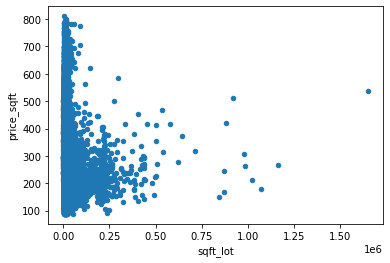

In [18]:
df.plot(x="sqft_lot", y="price_sqft", kind="scatter");

In [20]:
zipcodes = df['zipcode'].unique()

In [21]:
zipcodes.sort()
zipcodes

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [22]:
zip_map = {
    98001:'Suburbs', 98002:'Suburbs', 98003:'Suburbs', 98004:'Suburbs', 98005:'Suburbs',
    98006:'Suburbs', 98007:'Suburbs',98008:'Suburbs', 98010:'Rural', 98011:'Suburbs', 
    98014:'Rural', 98019:'Rural', 98022:'Rural', 98023:'Suburbs', 98024:'Rural', 
    98027:'Rural', 98028:'Suburbs', 98029:'Suburbs', 98030:'Suburbs', 98031:'Suburbs',
    98032:'Suburbs', 98033:'Suburbs', 98034:'Suburbs', 98038:'Rural', 98039:'Suburbs',
    98040:'Suburbs', 98042:'Rural', 98045:'Rural', 98052:'Suburbs', 98053:'Rural',
    98055:'Suburbs', 98056:'Suburbs', 98058:'Suburbs', 98059:'Suburbs', 98065:'Rural',
    98070:'Suburbs', 98072:'Suburbs', 98074:'Suburbs', 98075:'Suburbs', 98077:'Rural',
    98092:'Suburbs', 98102:'Seattle', 98103:'Seattle', 98105:'Seattle', 98106:'Seattle',
    98107:'Seattle', 98108:'Seattle', 98109:'Seattle', 98112:'Seattle', 98115:'Seattle', 
    98116:'Seattle', 98117:'Seattle', 98118:'Seattle', 98119:'Seattle', 98122:'Seattle',
    98125:'Seattle', 98126:'Seattle', 98133:'Seattle', 98136:'Seattle', 98144:'Seattle', 
    98146:'Seattle', 98148:'Seattle', 98155:'Seattle', 98166:'Seattle', 98168:'Seattle',
    98177:'Seattle', 98178:'Seattle', 98188:'Seattle', 98198:'Seattle', 98199:'Seattle'
    }

In [23]:
df['king_zones'] = df['zipcode'].map(zip_map)

In [24]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,price_sqft,king_zones
id,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178,188.050847,Seattle
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,209.338521,Seattle
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,233.766234,Suburbs
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,308.163265,Seattle
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,303.571429,Suburbs


Sorted zipcodes with following sources
- website =  https://www.unitedstateszipcodes.org/wa/ 
- map = https://aqua.kingcounty.gov/gis/web/VMC/boundaries/zipcodes/zipcodes.pdf

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,price_sqft
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845,264.143368
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072,110.000061
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000,87.588235
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000,182.291667
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000,244.644550
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000,318.333333
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000,810.138889


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
 11  price_sqft   21597 non-null  float64
 12  king_zones   21597 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 2.3+ MB
